In [3]:
%pip install imblearn
import pandas as pd
import matplotlib.pyplot as plot
from imblearn.over_sampling import SMOTE

data = pd.read_csv("Data\lymphography.csv")

data.head()

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Rafael\AppData\Local\Temp\ipykernel_6104\716827418.py:6: SyntaxWarning: invalid escape sequence '\l'
  data = pd.read_csv("Data\lymphography.csv")

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


#### 1. Identificação do atributo alvo (saída);

In [4]:
data["class"]
class_quantidade = data["class"].value_counts()

print(data["class"].describe());
print(class_quantidade)

count    148.000000
mean       2.452703
std        0.575396
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: class, dtype: float64
class
2    81
3    61
4     4
1     2
Name: count, dtype: int64


#### 2. Identificação dos tipos de dados dos atributos de entrada (quantitativo, qualitativo);

1. class: alvo
2. lymphatics: qualitativo
3. block of affere: qualitativo
4. bl. of lymph. c: qualitativo
5. bl. of lymph. s: qualitativo
6. by pass: qualitativo
7. extravasates: qualitativo
8. regeneration of: qualitativo
9. early uptake in: qualitativo
10. lym.nodes dimin: quantitativos
11. lym.nodes enlar: quantitativos
12. changes in lym.: qualitativo
13. defect in node: qualitativo
14. changes in node: qualitativo
15. changes in stru: qualitativo
16. special forms: qualitativo
17. dislocation of: qualitativo
18. exclusion of no: qualitativo
19. no. of nodes in: quantitativo


#### 3. Identificação da escala de dados dos atributos de entrada (nominal, ordinal, intervalar, racional);

1. class: alvo
2. lymphatics: ordinal
3. block of affere: nominal
4. bl. of lymph. c: nominal
5. bl. of lymph. s: nominal
6. by pass: nominal
7. extravasates: nominal
8. regeneration of: nominal
9. early uptake in: nominal
10. lym.nodes dimin: racional
11. lym.nodes enlar: racional
12. changes in lym.: ordinal
13. defect in node: nominal
14. changes in node: ordinal
15. changes in stru: ordinal
16. special forms: nominal
17. dislocation of: nominal
18. exclusion of no: nominal
19. no. of nodes in: racional

#### 4. Exploração dos dados através de medidas de localidade;

In [5]:


#MEDIA
mediaLymNodesDimin = data["lym.nodes dimin"].mean();
mediaLymNodesEnlar = data["lym.nodes enlar"].mean();
mediaNoOfNodes = data["no. of nodes in"].mean();

#MEDIANA
medianaLymNodesDimin = data["lym.nodes dimin"].median();
medianaLymNodesEnlar = data["lym.nodes enlar"].median();
medianaNoOfNodes = data["no. of nodes in"].median();

#MODAS
modaLymNodesDimin = data["lym.nodes dimin"].mode().iloc[0];
modaLymNodesEnlar = data["lym.nodes enlar"].mode().iloc[0];
modaNoOfNodes = data["no. of nodes in"].mode().iloc[0];


print("Medias: ")
print("Lym Nodes Dimin: {:.2f}".format(mediaLymNodesDimin))
print("Lym Nodes Enlar: {:.2f}".format(mediaLymNodesEnlar))
print("No. of Nodes in: {:.2f}".format(mediaNoOfNodes))

print("Medianas: ")
print("Lym Nodes Dimin: {:.2f}".format(medianaLymNodesDimin))
print("Lym Nodes Enlar: {:.2f}".format(medianaLymNodesEnlar))
print("No. of Nodes in: {:.2f}".format(medianaNoOfNodes))

print("Moda: ")
print("Lym Nodes Dimin: {:n}".format(modaLymNodesDimin))
print("Lym Nodes Enlar: {:n}".format(modaLymNodesEnlar))
print("No. of Nodes in: {:n}".format(modaNoOfNodes))


Medias: 
Lym Nodes Dimin: 1.06
Lym Nodes Enlar: 2.47
No. of Nodes in: 2.60
Medianas: 
Lym Nodes Dimin: 1.00
Lym Nodes Enlar: 2.00
No. of Nodes in: 2.00
Moda: 
Lym Nodes Dimin: 1
Lym Nodes Enlar: 2
No. of Nodes in: 1


#### 5. Exploração dos dados através de medidas de espalhamento;

In [6]:
medidas_espalhamento = data.loc[:, data.columns != 'class'].agg(['min', 'max', 'var', 'std', 'median', 'quantile']).T

interquartil = data.loc[:, data.columns != 'class'].quantile(0.75) - data.loc[:, data.columns != 'class'].quantile(0.25)

medidas_espalhamento["INQR"] = interquartil

medidas_espalhamento

,min,max,var,std,median,quantile,INQR
lymphatics,1.0,4.0,0.668321,0.817509,3.0,3.0,1.0
block of affere,1.0,2.0,0.248759,0.498757,2.0,2.0,1.0
bl. of lymph. c,1.0,2.0,0.145799,0.381836,1.0,1.0,0.0
bl. of lymph. s,1.0,2.0,0.045367,0.212995,1.0,1.0,0.0
by pass,1.0,2.0,0.185328,0.430498,1.0,1.0,0.0
extravasates,1.0,2.0,0.251655,0.501652,2.0,2.0,1.0
regeneration of,1.0,2.0,0.063431,0.251855,1.0,1.0,0.0
early uptake in,1.0,2.0,0.210333,0.458621,2.0,2.0,1.0
lym.nodes dimin,1.0,3.0,0.098318,0.313557,1.0,1.0,0.0
lym.nodes enlar,1.0,4.0,0.699945,0.836627,2.0,2.0,1.0


#### 6. Exploração dos dados através de medidas de distribuição;

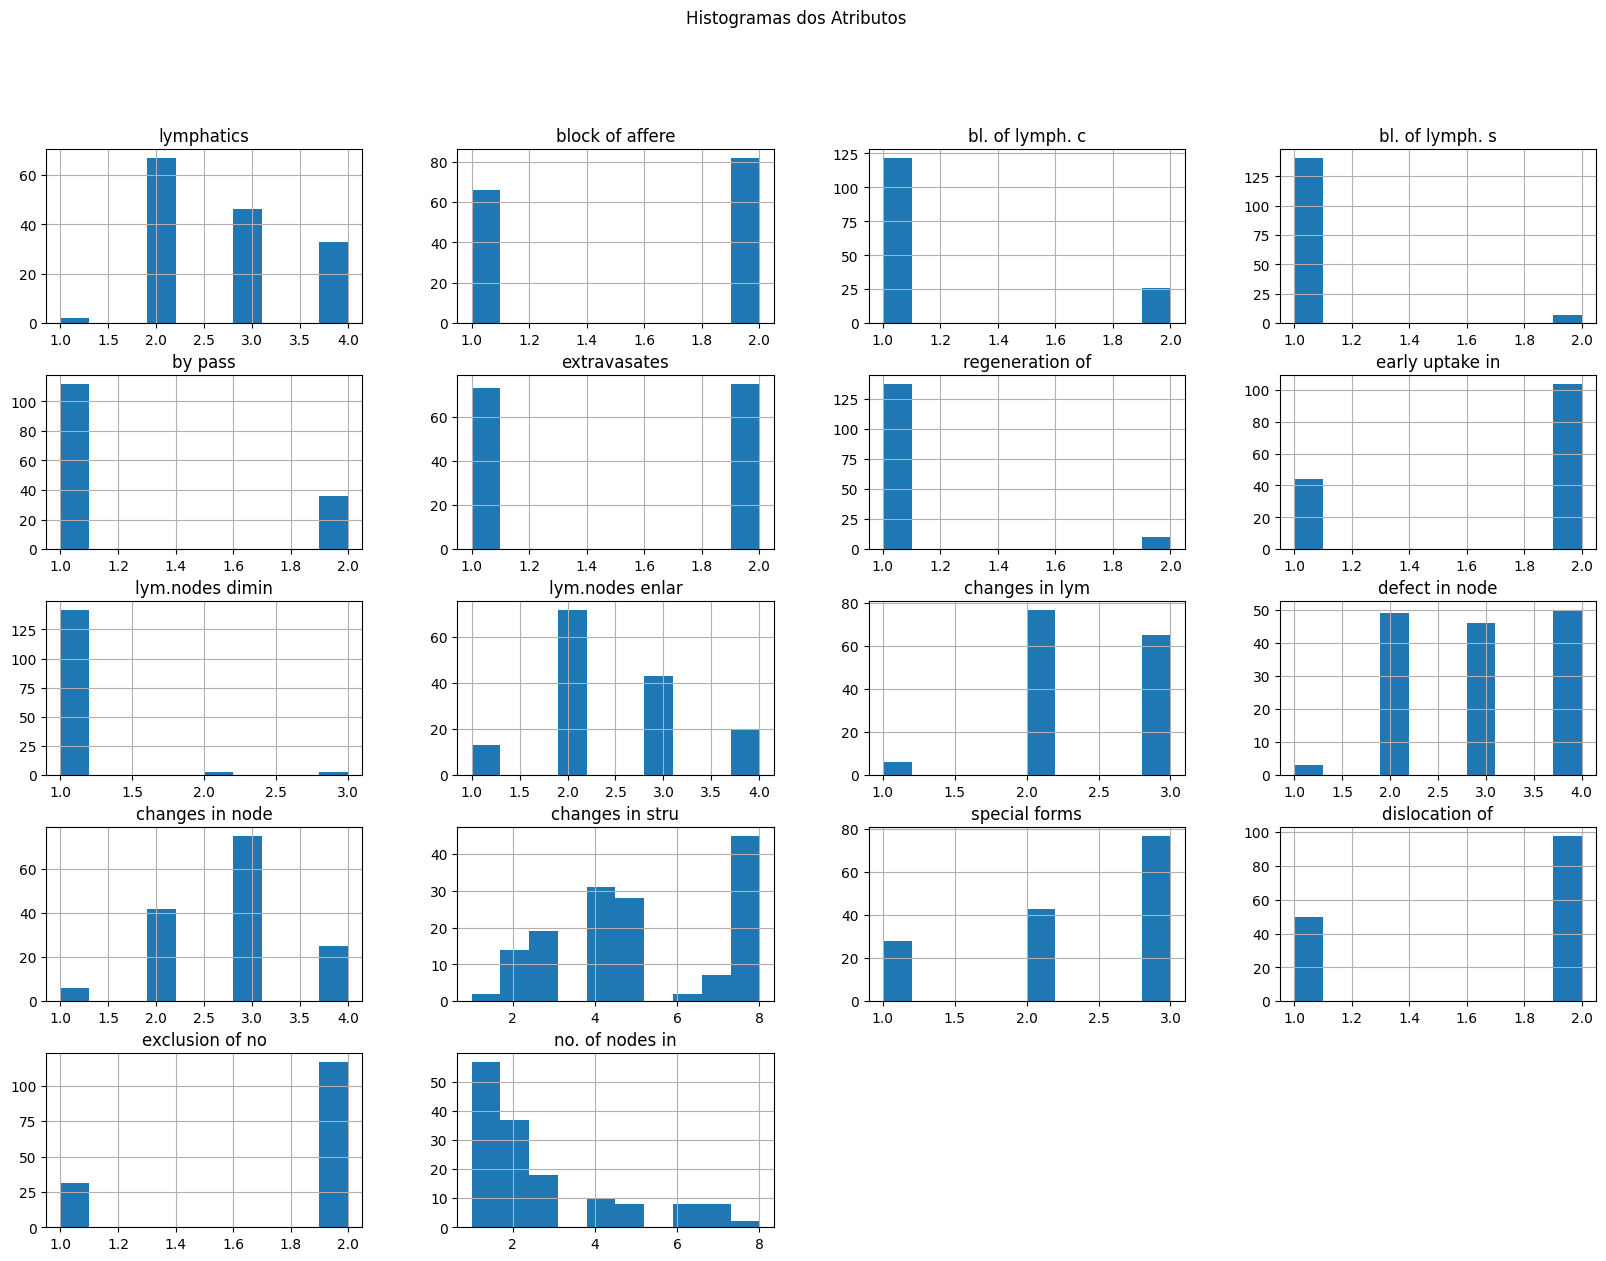

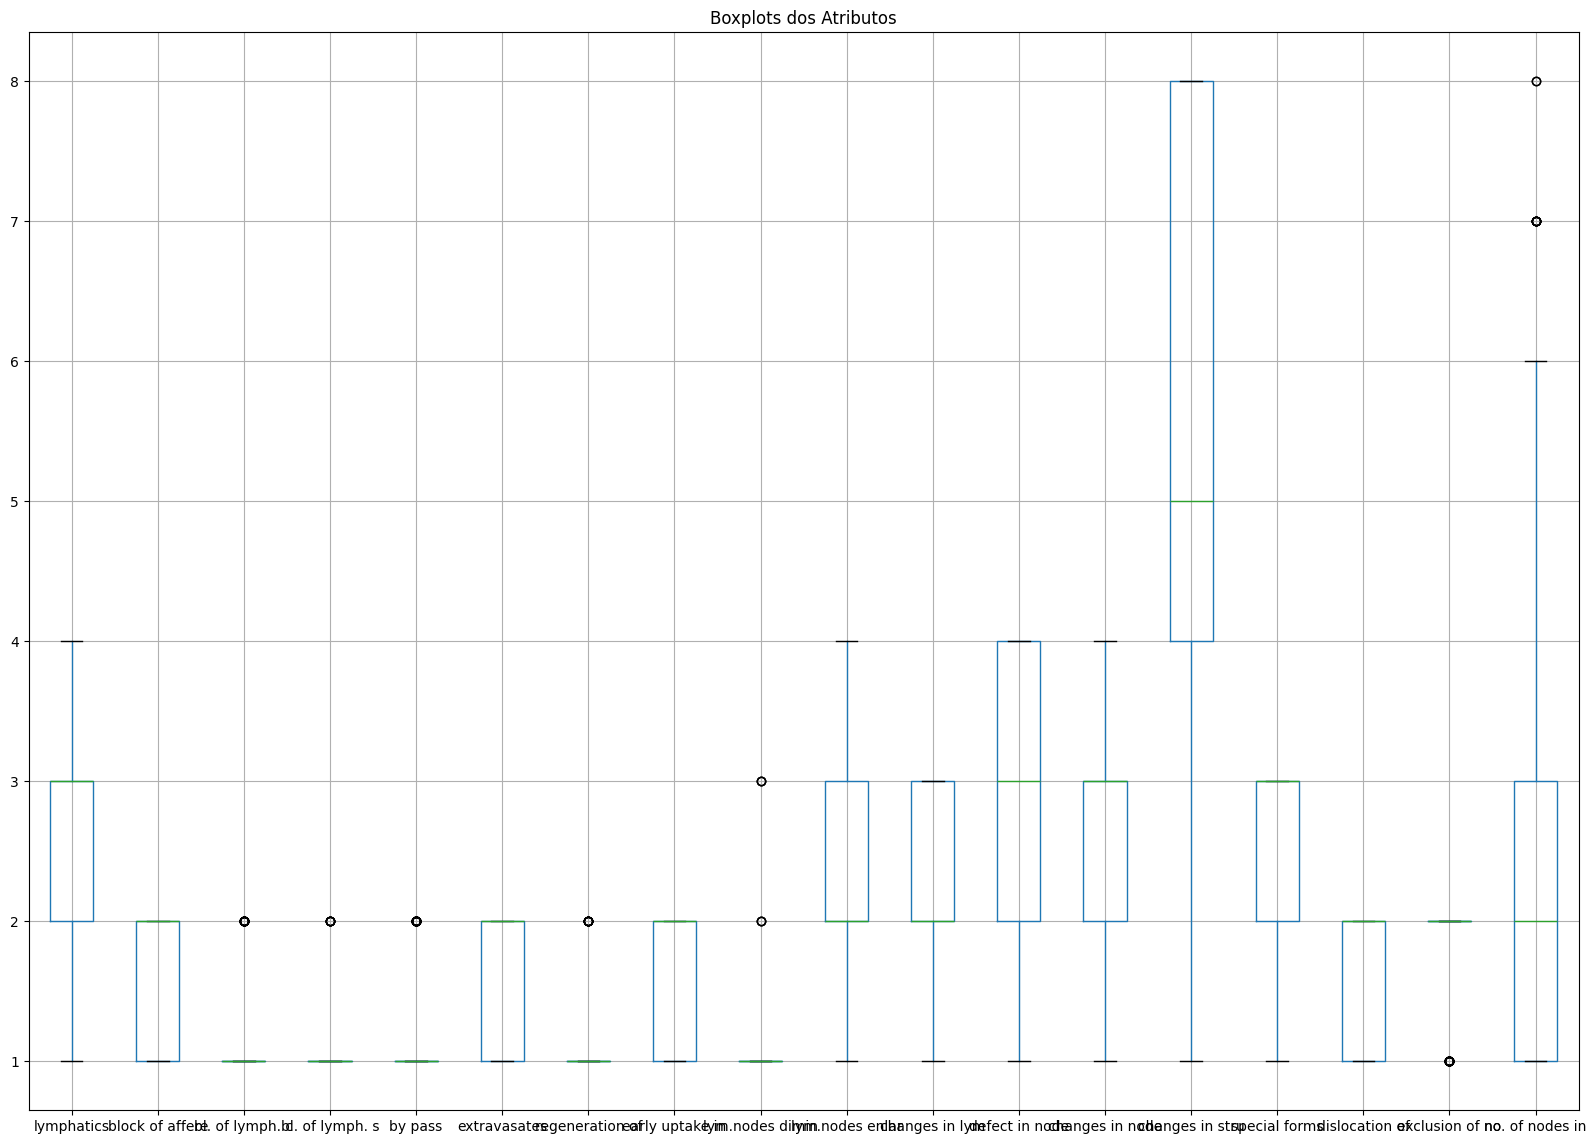

                   Curtose  Obliquidade
lymphatics       -1.135604     0.355663
block of affere  -1.978646    -0.219724
bl. of lymph. c   0.978435     1.722032
bl. of lymph. s  16.794822     4.309063
by pass          -0.545446     1.209177
extravasates     -2.026830    -0.027307
regeneration of  10.255955     3.481025
early uptake in  -1.213633    -0.896076
lym.nodes dimin  29.749465     5.442362
lym.nodes enlar  -0.504096     0.333795
changes in lym   -0.793145    -0.268961
defect in node   -1.259010    -0.123890
changes in node  -0.277793    -0.214188
changes in stru  -1.331199     0.089545
special forms    -1.044921    -0.654557
dislocation of   -1.541102    -0.692755
exclusion of no   0.082169    -1.442651
no. of nodes in   0.405021     1.203312


In [7]:
data.loc[:, data.columns != 'class'].hist(bins=10, figsize=(20, 14))
plot.suptitle("Histogramas dos Atributos")
plot.show()

plot.figure(figsize=(20, 14))
data.loc[:, data.columns != 'class'].boxplot(figsize=(20,14))
plot.title("Boxplots dos Atributos")
plot.show()

curt = data.loc[:, data.columns != 'class'].kurtosis();
obliq = data.loc[:, data.columns != 'class'].skew();

curt_obliq = pd.DataFrame({
    "Curtose": curt,
    "Obliquidade": obliq
})

print(curt_obliq)

#### 7. Identificação e separação do conjunto de teste, que será utilizado para testar o desempenho dos modelos – o conjunto de testes deve ser representativo e ter as características da população completa. Caso sua base de dados já tenha o conjunto de teste definido, analisar se este segue as características do conjunto de treinamento;

classe 1     2
classe 2    81
classe 3    61
classe 4     4

In [8]:
data_class1 = data[data['class'] == 1]
data_class2 = data[data['class'] == 2]
data_class3 = data[data['class'] == 3]
data_class4 = data[data['class'] == 4]

training_class1 = data_class1.iloc[:1]
training_class2 = data_class2.iloc[:41]
training_class3 = data_class3.iloc[:31]
training_class4 = data_class4.iloc[:2]

teste_class1 = data_class1.iloc[1:]
teste_class2 = data_class2.iloc[41:]
teste_class3 = data_class3.iloc[31:]
teste_class4 = data_class4.iloc[2:]

data_treino = pd.concat([training_class1, training_class2, training_class3, training_class4])
data_teste = pd.concat([teste_class1, teste_class2, teste_class3, teste_class4])

print(data_treino["class"].value_counts())
print(data_teste["class"].value_counts())


class
2    41
3    31
4     2
1     1
Name: count, dtype: int64
class
2    40
3    30
4     2
1     1
Name: count, dtype: int64


#### 8. Identificação e eliminação de atributos não necessários;

Todos os atributos são relacionados.

#### 9. Identificação e eliminação de exemplos não necessários;

Todos os exemplos possuem correlação com a classificação.

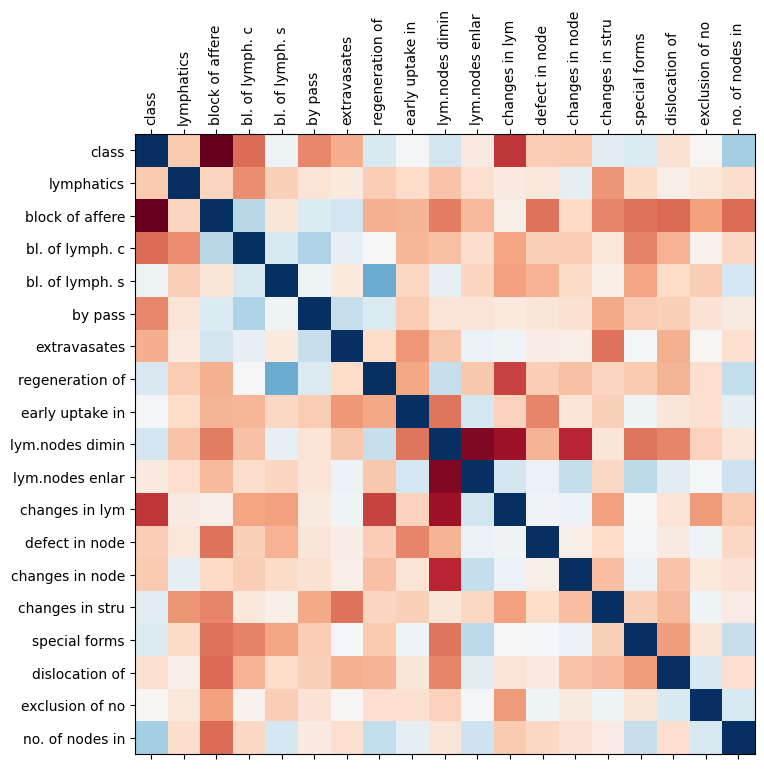

In [9]:
corr = data_treino.corr();
fig = plot.figure(figsize=(8,8))
plot.matshow(corr, cmap="RdBu", fignum=fig.number)
plot.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plot.yticks(range(len(corr.columns)), corr.columns);

#### 10. Análise e aplicação de técnicas de amostragem de dados (caso não seja necessário, analisar o porquê);

A população é relativamente pequena, podemos utilizá-la por completo.

#### 11. Identificação e aplicação de técnicas para minimizar problemas de desbalanceamento (caso não seja necessário, analisar o porquê);

Como a base está muito desbalanceda, não faz sentido utilizar métodos de remoção de majoritários nem adição de minoritários. Acredito que a melhor opção seja atribuir um peso maior para os atributos das classes muito minoritárias, assim permitindo que quando encontrarmos parametros que levem a classificação como uma dessas classes, não tenha um vies muito forte.

#### 12. Limpeza de dados: a. Identificação e eliminação de ruídos ou outliers; b. Identificação e eliminação de dados inconsistentes; c. Identificação e eliminação de dados redundantes; d. Identificação e resolução de dados incompletos (ausentes) – utilização de alguma técnica de preenchimento e justificar;

Base não possui dados incompletos ou incosistentes.

In [10]:
data = data.drop_duplicates()

def remover_outliers(df, coluna):
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    IQR = q3 - q1
    inferior = q1 - 1.5 * IQR
    superior = q3 + 1.5 * IQR
    outliers = df[(df[coluna] >= inferior) & (df[coluna] <= superior)]
    return outliers

atributos_quantitativos = ["lym.nodes dimin", "lym.nodes enlar", "no. of nodes in"]
for coluna in atributos_quantitativos:
    data = remover_outliers(data, coluna)

print(data.describe())

            class  lymphatics  block of affere  bl. of lymph. c  \
count  135.000000  135.000000       135.000000       135.000000   
mean     2.385185    2.696296         1.562963         1.155556   
std      0.518108    0.822029         0.497867         0.363783   
min      1.000000    1.000000         1.000000         1.000000   
25%      2.000000    2.000000         1.000000         1.000000   
50%      2.000000    2.000000         2.000000         1.000000   
75%      3.000000    3.000000         2.000000         1.000000   
max      3.000000    4.000000         2.000000         2.000000   

       bl. of lymph. s     by pass  extravasates  regeneration of  \
count       135.000000  135.000000    135.000000       135.000000   
mean          1.014815    1.207407      1.488889         1.022222   
std           0.121261    0.406960      0.501738         0.147955   
min           1.000000    1.000000      1.000000         1.000000   
25%           1.000000    1.000000      1.000000   

#### 13. Identificação e conversão dos tipos de dados (caso não seja necessário, analisar o porquê). Os tipos de conversão que podem ser utilizados são: a. Conversão de tipos (simbólico para numérico, ordinal para numérico, nominal para binário, numérico para ordinal); b. Normalização dos dados (re-escala ou padronização);

Os dados ja estão convertidos numéricos ou em escala normalizada.

#### 14. Análise e aplicação de alguma técnica para redução de dimensionalidade – pesquisar alguma técnica utilizada na literatura e aplicar;